In [1]:
#ilgili kütüphanelerin tanımlanması
from keras.utils import to_categorical #kategorik verileri one-hot encoding formatına dönüştürmek için kullanılır
from keras.preprocessing.image import load_img #Resim dosyalarını yüklemek için kullanılır, görüntüleri işlemek için ihtiyacımız var.
from keras.models import Sequential #Ardışık model tanımlamak için kullanacağız; katmanların sırayla eklenmesini sağlar.
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D #Farklı katman türlerini tanımlamak için kullanılır; CNN mimarisini oluşturmak için gereklidir.
import os #Dosya ve dizin işlemleri için kullanacağız.
import pandas as pd # Veri manipülasyonu ve analizi için kullanılır; etiketler ve diğer verilerle çalışmak için DataFrame yapısını sağlar.
import numpy as np #Matematiksel işlemlerin yapılması için gereklidir.
from tqdm.notebook import tqdm

In [2]:
#veri setlerinin konumları
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = [] #görüntüleri saklamak için liste oluşturduk
    labels = [] #etiketler için bir liste oluşturduk
    for label in os.listdir(dir): #dizideki etkiletler için döngü başlattık
        for imagename in os.listdir(os.path.join(dir,label)): #her etiket altındaki görüntülerin isimleri için döngü başlattık
            image_paths.append(os.path.join(dir,label,imagename)) #görüntünün yolunu listeye ekledik
            labels.append(label) #etiketi listeye ekledik 
        print(label, "completed") #işlem tamamlandığında bilgi veriyoruz
    return image_paths,labels

In [4]:
train = pd.DataFrame() #burada eğittiğimiz verilerini saklayacağız
train['image'] , train['label'] = createdataframe(TRAIN_DIR) # image kısmına görüntülerin yolunu,label kısmına etiketleri ekliyoruz.

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train) #train verileri yazdırdık

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
24414  images/train\surprise\9969.jpg  surprise
24415  images/train\surprise\9985.jpg  surprise
24416  images/train\surprise\9990.jpg  surprise
24417  images/train\surprise\9992.jpg  surprise
24418  images/train\surprise\9996.jpg  surprise

[24419 rows x 2 columns]


In [6]:
test = pd.DataFrame() #burada test verilerini saklayacağız
test['image'], test['label'] = createdataframe(TEST_DIR)  # image kısmına görüntülerin yolunu,label kısmına etiketleri ekliyoruz.

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)#test verilerini yazdırdık
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm
from PIL import Image

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(48, 48), color_mode='rgb')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,3)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/24419 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
# Ağırlıkları kaydetmek için callback oluştur
checkpoint_filepath = 'emotiondetector_checkpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,  # Sadece ağırlıkları kaydet
    monitor='accuracy',  # Doğruluğu takip et
    mode='max',  # En iyi doğruluğu hedefle
    save_best_only=True  # Sadece en iyi ağırlıkları kaydet
)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=20, 
    validation_data=(x_test, y_test),  # Doğrulama verisi olarak test seti
    callbacks=[model_checkpoint_callback]  # callback'i buraya ekliyoruz
)


Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 48, 48, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 48, 48, 3), dtype=float32)
  • training=True
  • mask=None

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")


In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
import numpy as np
def ef(image):
    img = load_img(image, target_size=(48, 48), color_mode='grayscale') 
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [26]:
from tensorflow.keras.preprocessing.image import load_img
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
model prediction is  disgust


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
model prediction is  disgust


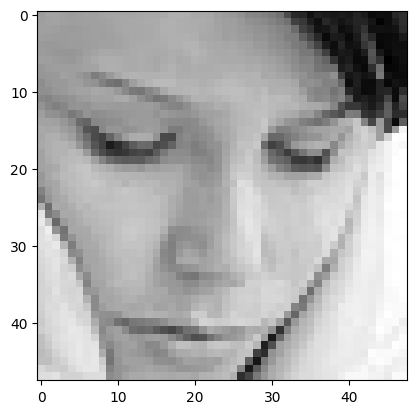

In [28]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  disgust


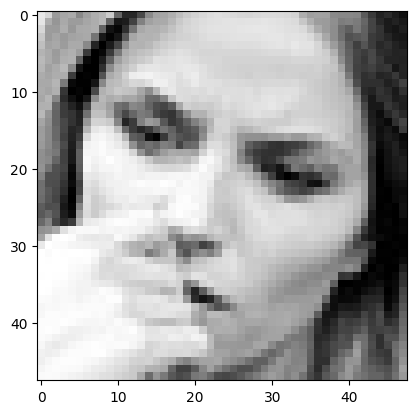

In [29]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  disgust


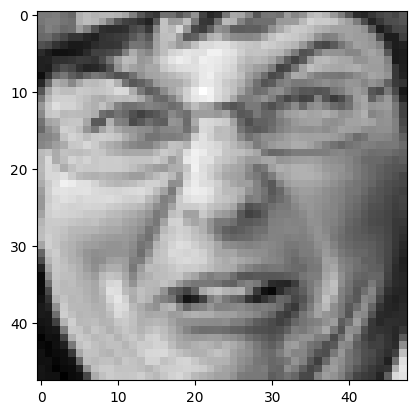

In [30]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is  disgust


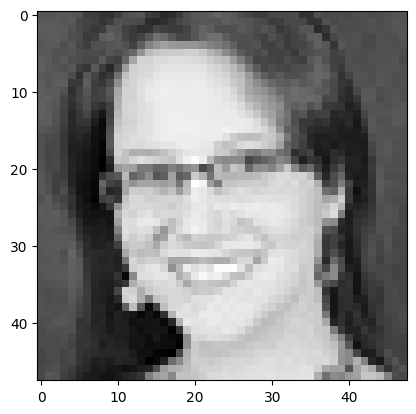

In [31]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
model prediction is  disgust


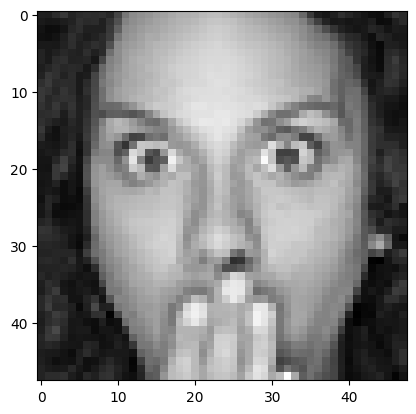

In [32]:
image = 'images/train/surprise/5026.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  disgust


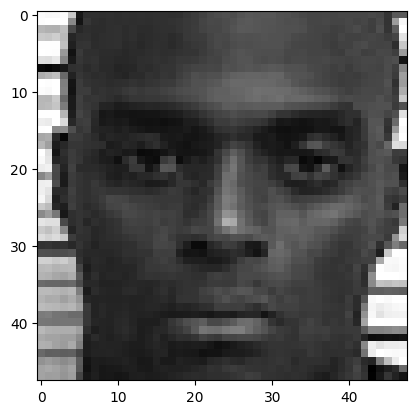

In [33]:
image = 'images/train/neutral/274.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')